In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
from tensorflow import keras    
from tensorflow.keras.models import save_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, classification_report, roc_auc_score
from IPython.display import display, HTML
from xgboost import XGBClassifier
from sklearn.utils import class_weight
import os
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [88]:
data = pd.read_csv("C:/Users/andri/Documents/Andri Martin/Trisakti/Semester 6/DBS_Coding-Camp2025/Capstone/Colab/Capstone_Akmal_Andri_Zahran/recipes_new.csv")
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440,45,1485,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,https://img.sndimg.com/food/image/upload/w_555...,Frozen Desserts,"Dessert, Low Protein, Low Cholesterol, Healthy...","4, 1/4, 1, 1","blueberries, granulated sugar, vanilla yogurt,...",4.5,4.0,171,2,1,8,30,37,4,30,3,4.0,"Toss 2 cups berries with sugar., Let stand for..."
1,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,50,30,80,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,https://img.sndimg.com/food/image/upload/w_555...,Pie,"Dessert, Healthy, Weeknight, Oven, < 4 Hours","3/4, 1, 1, 2, 3, 1/4, 1, 1/2, 1/2, 2","sugar, margarine, egg, flour, salt, buttermilk...",4.0,3.0,228,7,2,24,282,38,0,25,4,8.0,"Preheat oven to 350°F., Make pie crust, using ..."
2,49,Chicken Breasts Lombardi,174711,Queen Dragon Mom,30,45,75,1999-08-14T19:58:00Z,Make and share this Chicken Breasts Lombardi r...,https://img.sndimg.com/food/image/upload/w_555...,Chicken Breast,"Chicken, Poultry, Meat, European, Very Low Car...","2, 2, 12, 1/2, 1/3, 3/4, 1/2, 1/2, 1/2, 1/2, 1/4","fresh mushrooms, butter, boneless skinless chi...",5.0,21.0,628,25,13,203,849,14,1,2,58,6.0,Cook mushrooms in 2 tbsp butter in a large sk...
3,56,Buttermilk Pie,1581,thefensk,60,20,80,1999-08-30T10:02:00Z,This recipe was originally noted by my wife on...,https://img.sndimg.com/food/image/upload/w_555...,Pie,"Dessert, Oven, < 4 Hours, Easy","1/2, 1 1/2, 3, 3, 1, 1, 1, 1","butter, margarine, sugar, flour, eggs, salt, v...",5.0,171.0,396,19,10,102,270,52,1,40,5,8.0,"Preheat oven to 400°F., Beat the butter and su..."
4,58,Low-Fat Burgundy Beef & Vegetable Stew,1533,Dancer,134,30,164,1999-08-14T19:48:00Z,Make and share this Low-Fat Burgundy Beef & Ve...,https://img.sndimg.com/food/image/upload/w_555...,Stew,"Vegetable, Meat, Low Cholesterol, Healthy, Fre...","1 1/2, 1, 1, 1/2, 1/2, 1, 1/2, 3, 5 1/2, 1, 2, 1","beef eye round, dried thyme leaves, salt, pepp...",4.5,7.0,280,6,2,67,592,22,6,9,30,6.0,"Trim fat from beef, cut into 1-inch pieces., I..."


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52785 entries, 0 to 52784
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RecipeId                    52785 non-null  int64  
 1   Name                        52785 non-null  object 
 2   AuthorId                    52785 non-null  int64  
 3   AuthorName                  52785 non-null  object 
 4   CookTime                    52785 non-null  int64  
 5   PrepTime                    52785 non-null  int64  
 6   TotalTime                   52785 non-null  int64  
 7   DatePublished               52785 non-null  object 
 8   Description                 52785 non-null  object 
 9   Images                      52785 non-null  object 
 10  RecipeCategory              52785 non-null  object 
 11  Keywords                    52785 non-null  object 
 12  RecipeIngredientQuantities  52785 non-null  object 
 13  RecipeIngredientParts       527

In [90]:
data.describe()

,RecipeId,AuthorId,CookTime,PrepTime,TotalTime,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,52785.00000,5.278500e+04,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000,52785.000000
mean,238704.91526,9.929988e+06,50.415156,24.342673,74.757829,4.722175,8.492981,338.701752,17.103571,6.868940,76.118291,513.285005,29.111244,2.503249,9.106356,17.278185,8.366108
std,141371.90982,1.352360e+08,208.252735,179.610702,276.908575,0.496496,32.791915,189.684590,13.028236,5.878276,66.363035,440.447820,20.503672,2.242995,10.061286,15.102913,8.892633
min,38.00000,2.700000e+01,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,117983.00000,6.698300e+04,15.000000,10.000000,27.000000,4.500000,2.000000,198.000000,7.000000,2.000000,25.000000,182.000000,13.000000,1.000000,2.000000,5.000000,4.000000
50%,226947.00000,2.040240e+05,25.000000,15.000000,40.000000,5.000000,3.000000,305.000000,14.000000,5.000000,61.000000,382.000000,26.000000,2.000000,5.000000,12.000000,6.000000
75%,350851.00000,4.304710e+05,45.000000,20.000000,65.000000,5.000000,7.000000,441.000000,23.000000,10.000000,107.000000,721.000000,41.000000,4.000000,12.000000,27.000000,8.000000
max,540664.00000,2.002454e+09,21600.000000,21600.000000,21645.000000,5.000000,3063.000000,1268.000000,77.000000,33.000000,371.000000,2405.000000,135.000000,12.000000,47.000000,94.000000,400.000000


In [91]:
# Tampilkan semua kolom
pd.set_option('display.max_columns', None)  # Tidak ada batas jumlah kolom
pd.set_option('display.expand_frame_repr', False)  # Tampilkan dalam 1 baris (jika memungkinkan)
data = pd.read_csv("C:/Users/andri/Documents/Andri Martin/Trisakti/Semester 6/DBS_Coding-Camp2025/Capstone/Colab/Capstone_Akmal_Andri_Zahran/recipes_new.csv")
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440,45,1485,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,https://img.sndimg.com/food/image/upload/w_555...,Frozen Desserts,"Dessert, Low Protein, Low Cholesterol, Healthy...","4, 1/4, 1, 1","blueberries, granulated sugar, vanilla yogurt,...",4.5,4.0,171,2,1,8,30,37,4,30,3,4.0,"Toss 2 cups berries with sugar., Let stand for..."
1,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,50,30,80,1999-08-06T00:40:00Z,Make and share this Buttermilk Pie With Ginger...,https://img.sndimg.com/food/image/upload/w_555...,Pie,"Dessert, Healthy, Weeknight, Oven, < 4 Hours","3/4, 1, 1, 2, 3, 1/4, 1, 1/2, 1/2, 2","sugar, margarine, egg, flour, salt, buttermilk...",4.0,3.0,228,7,2,24,282,38,0,25,4,8.0,"Preheat oven to 350°F., Make pie crust, using ..."
2,49,Chicken Breasts Lombardi,174711,Queen Dragon Mom,30,45,75,1999-08-14T19:58:00Z,Make and share this Chicken Breasts Lombardi r...,https://img.sndimg.com/food/image/upload/w_555...,Chicken Breast,"Chicken, Poultry, Meat, European, Very Low Car...","2, 2, 12, 1/2, 1/3, 3/4, 1/2, 1/2, 1/2, 1/2, 1/4","fresh mushrooms, butter, boneless skinless chi...",5.0,21.0,628,25,13,203,849,14,1,2,58,6.0,Cook mushrooms in 2 tbsp butter in a large sk...
3,56,Buttermilk Pie,1581,thefensk,60,20,80,1999-08-30T10:02:00Z,This recipe was originally noted by my wife on...,https://img.sndimg.com/food/image/upload/w_555...,Pie,"Dessert, Oven, < 4 Hours, Easy","1/2, 1 1/2, 3, 3, 1, 1, 1, 1","butter, margarine, sugar, flour, eggs, salt, v...",5.0,171.0,396,19,10,102,270,52,1,40,5,8.0,"Preheat oven to 400°F., Beat the butter and su..."
4,58,Low-Fat Burgundy Beef & Vegetable Stew,1533,Dancer,134,30,164,1999-08-14T19:48:00Z,Make and share this Low-Fat Burgundy Beef & Ve...,https://img.sndimg.com/food/image/upload/w_555...,Stew,"Vegetable, Meat, Low Cholesterol, Healthy, Fre...","1 1/2, 1, 1, 1/2, 1/2, 1, 1/2, 3, 5 1/2, 1, 2, 1","beef eye round, dried thyme leaves, salt, pepp...",4.5,7.0,280,6,2,67,592,22,6,9,30,6.0,"Trim fat from beef, cut into 1-inch pieces., I..."


In [92]:
columns = [
    'RecipeId', 'Name', 'CookTime', 'PrepTime', 'TotalTime',
    'RecipeIngredientParts', 'Calories', 'FatContent', 'SaturatedFatContent',
    'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
    'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'Keywords', 
    'Images'
]
data = data[columns]
data.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,Keywords,Images
0,38,Low-Fat Berry Blue Frozen Dessert,1440,45,1485,"blueberries, granulated sugar, vanilla yogurt,...",171,2,1,8,30,37,4,30,3,4.0,"Dessert, Low Protein, Low Cholesterol, Healthy...",https://img.sndimg.com/food/image/upload/w_555...
1,45,Buttermilk Pie With Gingersnap Crumb Crust,50,30,80,"sugar, margarine, egg, flour, salt, buttermilk...",228,7,2,24,282,38,0,25,4,8.0,"Dessert, Healthy, Weeknight, Oven, < 4 Hours",https://img.sndimg.com/food/image/upload/w_555...
2,49,Chicken Breasts Lombardi,30,45,75,"fresh mushrooms, butter, boneless skinless chi...",628,25,13,203,849,14,1,2,58,6.0,"Chicken, Poultry, Meat, European, Very Low Car...",https://img.sndimg.com/food/image/upload/w_555...
3,56,Buttermilk Pie,60,20,80,"butter, margarine, sugar, flour, eggs, salt, v...",396,19,10,102,270,52,1,40,5,8.0,"Dessert, Oven, < 4 Hours, Easy",https://img.sndimg.com/food/image/upload/w_555...
4,58,Low-Fat Burgundy Beef & Vegetable Stew,134,30,164,"beef eye round, dried thyme leaves, salt, pepp...",280,6,2,67,592,22,6,9,30,6.0,"Vegetable, Meat, Low Cholesterol, Healthy, Fre...",https://img.sndimg.com/food/image/upload/w_555...


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52785 entries, 0 to 52784
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecipeId               52785 non-null  int64  
 1   Name                   52785 non-null  object 
 2   CookTime               52785 non-null  int64  
 3   PrepTime               52785 non-null  int64  
 4   TotalTime              52785 non-null  int64  
 5   RecipeIngredientParts  52785 non-null  object 
 6   Calories               52785 non-null  int64  
 7   FatContent             52785 non-null  int64  
 8   SaturatedFatContent    52785 non-null  int64  
 9   CholesterolContent     52785 non-null  int64  
 10  SodiumContent          52785 non-null  int64  
 11  CarbohydrateContent    52785 non-null  int64  
 12  FiberContent           52785 non-null  int64  
 13  SugarContent           52785 non-null  int64  
 14  ProteinContent         52785 non-null  int64  
 15  Re

In [94]:
DIET_KEYWORDS = {
    'Vegetarian': [
        'vegetarian', 'vegan', 'vegetable', 'soy/tofu', 'tempeh',
        'dairy free foods', 'egg free', 'lactose free'
    ],
    'Pescatarian': [
        'fish', 'seafood', 'salmon', 'tuna', 'halibut', 'bass', 'catfish',
        'tilapia', 'trout', 'whitefish', 'mahi mahi', 'orange roughy',
        'crab', 'lobster', 'mussels', 'oysters', 'squid', 'octopus',
        'crawfish', 'no shell fish'
    ],
    'Low Calorie': [
        'low calorie', 'healthy', 'light', 'low cholesterol', 'low protein',
        'very low carbs', 'high fiber'
    ],
    'High Protein': [
        'high protein', 'protein', 'chicken breast', 'chicken livers',
        'beef organ meats', 'beef liver', 'steak', 'pork', 'veal',
        'lamb/sheep', 'duck breasts', 'turkey breasts'
    ],
    'Free From': [
        'egg free', 'lactose free', 'no shell fish', 'dairy free foods',
        'free of...'
    ]
}

COOKING_METHOD_KEYWORDS = {
    'No Cook': ['no cook'],
    'Stove Top': ['stove top'],
    'Oven': ['oven', 'baking', 'broil/grill'],
    'Microwave': ['microwave'],
    'Pressure Cooking': ['pressure cooker'],
    'Deep Fry': ['deep fried'],
    'Steaming': ['steam'],
    'Grill': ['broil/grill'],
    'Freezer/Fridge': ['refrigerator', 'freezer'],
    'Canning/Preserve': ['canning', 'dehydrator'],
    'Stir Fry': ['stir fry', 'wok']
}

TIME_KEYWORDS = {
    'Quick (< 15 Mins)': ['< 15 mins'],
    'Short (< 30 Mins)': ['< 30 mins'],
    'Moderate (< 60 Mins)': ['< 60 mins'],
    'Extended (< 4 Hours)': ['< 4 hours'],
    'Weeknight-Friendly': ['weeknight'],
    'Inexpensive': ['inexpensive'],
}

EQUIPMENT_KEYWORDS = {
    'Appliances': ['small appliance', 'mixer', 'dehydrator'],
    'Cookware': ['pressure cooker', 'oven', 'microwave', 'refrigerator', 'freezer', 'wok'],
    'Baking Tools': ['bread machine'],
}

DISH_TYPE_KEYWORDS = {
    'Breakfast': ['breakfast', 'brunch'],
    'Lunch/Snack': ['lunch/snacks'],
    'Dinner/Main': ['one dish meal', 'stew', 'pot roast', 'meatloaf'],
    'Dessert': ['dessert', 'frozen desserts', 'ice cream', 'cheesecake', 'bar cookie', 'drop cookies', 'chocolate chip cookies', 'cake'],
    'Soup/Stew': ['stew', 'chowders', 'clear soup', 'beef barley soup', 'mushroom soup'],
    'Pasta/Noodles': ['pasta shells', 'penne', 'spaghetti', 'macaroni and cheese', 'manicotti', 'pasta elbow'],
    'Bread': ['breads', 'quick breads', 'yeast breads', 'sourdough breads'],
    'Pies': ['savory pies', 'pie'],
    'Cookies': ['cookie & brownie', 'drop cookies', 'bar cookie'],
    'Beverages': ['beverages', 'punch beverage', 'smoothies', 'shakes'],
    'Sauces/Spreads': ['sauces', 'chutneys', 'spreads'],
    'Side Dishes': ['side dish', 'accompaniment', 'garnish', 'coleslaw', 'potato salad']
}

INGREDIENT_KEYWORDS = {
    'Protein': [
        'chicken', 'beef', 'pork', 'duck', 'goose', 'turkey', 'veal', 'rabbit',
        'lamb/sheep', 'quail', 'deer', 'moose', 'elk', 'pheasant', 'wild game'
    ],
    'Seafood': [
        'tuna', 'halibut', 'catfish', 'tilapia', 'bass', 'trout', 'whitefish',
        'orange roughy', 'mahi mahi', 'crab', 'lobster', 'mussels', 'squid', 'octopus',
        'crawfish'
    ],
    'Vegetables': [
        'cauliflower', 'artichoke', 'onions', 'collard greens', 'spinach',
        'chard', 'peppers', 'pumpkin'
    ],
    'Fruits': [
        'apple', 'strawberry', 'plums', 'pineapple', 'cherries', 'berries',
        'raspberries', 'kiwifruit', 'melons', 'oranges', 'papaya', 'mango',
        'coconut', 'pear', 'lime', 'grapes', 'citrus', 'avocado', 'tropical fruits'
    ],
    'Grains & Rice': [
        'rice', 'brown rice', 'white rice', 'short grain rice',
        'medium grain rice', 'long grain rice', 'oatmeal', 'corn'
    ],
    'Legumes': ['beans', 'black beans', 'lentil', 'peanut butter'],
    'Dairy & Eggs': ['cheese', 'yogurt', 'egg free'],
    'Nuts & Seeds': ['nuts'],
}

REGIONAL_KEYWORDS = {
    'Asian': [
        'chinese', 'japanese', 'thai', 'vietnamese', 'indonesian', 'korean', 'filipino',
        'cambodian', 'malaysian', 'burmese', 'singaporean', 'laotian',
        'pakistani', 'indian', 'bangladeshi', 'nepali', 'sri lankan',
        'southwest asia (middle east)', 'lebanese', 'turkish', 'iraqi', 'iranian'
    ],
    'European': [
        'italian', 'greek', 'french', 'german', 'scandinavian', 'norwegian', 'swedish',
        'dutch', 'austrian', 'swiss', 'welsh', 'finnish', 'polish', 'portuguese',
        'russian', 'hungarian', 'czech', 'georgian', 'spanish'
    ],
    'African': [
        'moroccan', 'nigerian', 'egyptian', 'ethiopian', 'south african',
        'sudanese', 'somalian', 'ghanaian', 'kenyan', 'tanzanian'
    ],
    'American': [
        'southern u.s.', 'southwestern u.s.', 'native american', 'puerto rican',
        'cuban', 'caribbean', 'creole', 'cajun', 'tex mex'
    ],
    'Latin American': [
        'brazilian', 'argentinian', 'chilean', 'peruvian', 'colombian', 'ecuadorean',
        'venezuelan', 'guatemalan', 'costarican', 'mexican', 'honduran', 'nicaraguan',
        'salvadoran', 'panamanian', 'bolivian', 'paraguayan', 'uruguayan'
    ],
    'Oceanian': ['australian', 'new zealand', 'polynesian', 'fijian', 'samoan'],
    'Others': ['canadian', 'icelandic']
}

OCCASION_KEYWORDS = {
    'Holidays': [
        'christmas', 'thanksgiving', 'halloween', "st. patrick's day",
        'ramadan', 'hanukkah', 'labor day', 'memorial day', 'birthday', 'easter', 'new year'
    ],
    'Seasonal': ['spring', 'summer', 'winter', 'fall'],
    'Events': ['potluck', 'for large groups', 'camping', 'college food', 'beginner cook']
}

FLAVOR_PROFILE_KEYWORDS = {
    'Spicy': ['spicy', 'hot chili', 'cayenne', 'peppery', 'fiery'],
    'Savory/Umami': ['umami', 'savory', 'rich', 'meaty', 'miso'],
    'Sweet': ['sweet', 'sugary', 'honeyed'],
    'Sour': ['sour', 'tangy', 'citrusy', 'vinegary'],
    'Bitter': ['bitter'],
    'Salty': ['salty', 'briny', 'soy sauce'],
}


In [95]:
def calculate_user_calorie_needs(user_data):
    """
    Menghitung kebutuhan kalori harian berdasarkan data user
    """
    # Hitung BMI
    height_m = user_data['height'] / 100
    bmi = user_data['weight'] / (height_m ** 2)
    
    # Hitung BMR (Mifflin-St Jeor Equation)
    if user_data['gender'].lower() == 'male':
        bmr = 10 * user_data['weight'] + 6.25 * user_data['height'] - 5 * user_data['age'] + 5
    else:
        bmr = 10 * user_data['weight'] + 6.25 * user_data['height'] - 5 * user_data['age'] - 161
    
    # Adjust based on activity level
    activity_multiplier = {
        'sedentary': 1.2,
        'light': 1.375,
        'moderate': 1.55,
        'active': 1.725,
        'very active': 1.9
    }
    
    # Adjust based on goal
    goal_adjustment = {
        'weight_loss': -500,
        'maintenance': 0,
        'weight_gain': 500
    }
    
    tdee = bmr * activity_multiplier[user_data['activity_level']]
    return tdee + goal_adjustment[user_data['goal']]

In [96]:
# Preprocess kolom Keywords supaya jadi list lowercase
def preprocess_keywords(df):
    # Ubah string Keywords menjadi list of keyword, lowercase dan strip spasi
    df['Keywords_list'] = df['Keywords'].str.lower().str.split(',\s*')
    return df

data = preprocess_keywords(data)

In [97]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Misal kamu punya dataframe bernama data
# Kalau user_id tidak ada, skip bagian user embedding

# Mapping RecipeId ke indeks kategori
data['RecipeId_cat'] = data['RecipeId'].astype('category').cat.codes.values
num_recipes = data['RecipeId_cat'].nunique()

# Fitur numerik yang akan diskalakan
features_to_use = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
    'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings'
]

X_food = data[features_to_use].values
scaler = MinMaxScaler()
X_food_scaled = scaler.fit_transform(X_food)

# Buat label, misal berdasarkan CookTime (karena AggregatedRating tidak ada)
# Contoh: label biner apakah CookTime lebih dari median atau tidak
y = (data['CookTime'] > data['CookTime'].median()).astype(int).values

# Split tahap 1: Train+Val vs Test
X_food_temp, X_test_food, recipe_temp, recipe_test, y_temp, y_test = train_test_split(
    X_food_scaled, data['RecipeId_cat'].values, y, test_size=0.2, random_state=42
)

# Split tahap 2: Train vs Val
X_train_food, X_val_food, recipe_train, recipe_val, y_train, y_val = train_test_split(
    X_food_temp, recipe_temp, y_temp, test_size=0.25, random_state=42  # 0.25 x 0.8 = 0.2
)

print(f"Num recipes: {num_recipes}")
print(f"Train shapes: {X_train_food.shape}, {recipe_train.shape}, {y_train.shape}")
print(f"Validation shapes: {X_val_food.shape}, {recipe_val.shape}, {y_val.shape}")
print(f"Test shapes: {X_test_food.shape}, {recipe_test.shape}, {y_test.shape}")


Num recipes: 52785
Train shapes: (31671, 10), (31671,), (31671,)
Validation shapes: (10557, 10), (10557,), (10557,)
Test shapes: (10557, 10), (10557,), (10557,)


In [98]:
# pastikan num_recipes dan features_to_use telah didefinisikan
EMBEDDING_SIZE = 8

In [99]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from xgboost import XGBClassifier

1. Neural Network (Embedding + Fitur)

In [100]:
# Model Summary
recipe_input = Input(shape=(), dtype=tf.int32, name='recipe_id')
food_features_input = Input(shape=(X_train_food.shape[1],), dtype=tf.float32, name='food_features')

recipe_embedding = layers.Embedding(input_dim=num_recipes, output_dim=EMBEDDING_SIZE, name='recipe_embedding')(recipe_input)
recipe_vec = layers.Flatten()(recipe_embedding)
concat = layers.Concatenate()([recipe_vec, food_features_input])

x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(concat)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.BatchNormalization()(x)
output = layers.Dense(1, activation='sigmoid')(x)

model_nn = Model(inputs=[recipe_input, food_features_input], outputs=output)
model_nn.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model_nn.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 recipe_id (InputLayer)      [(None,)]                    0         []                            
                                                                                                  
 recipe_embedding (Embeddin  (None, 8)                    422280    ['recipe_id[0][0]']           
 g)                                                                                               
                                                                                                  
 flatten_2 (Flatten)         (None, 8)                    0         ['recipe_embedding[0][0]']    
                                                                                                  
 food_features (InputLayer)  [(None, 10)]                 0         []                      

In [101]:
from sklearn.utils.class_weight import compute_class_weight
# Hitung class weight
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# Training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

history_nn = model_nn.fit(
    {'recipe_id': recipe_train, 'food_features': X_train_food},
    y_train,
    validation_data=({'recipe_id': recipe_val, 'food_features': X_val_food}, y_val),
    epochs=20,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/20
248/248 [==============================] - 3s 6ms/step - loss: 1.2755 - accuracy: 0.5542 - val_loss: 1.0116 - val_accuracy: 0.5747 - lr: 0.0010
Epoch 2/20
248/248 [==============================] - 2s 8ms/step - loss: 0.8878 - accuracy: 0.5920 - val_loss: 0.8118 - val_accuracy: 0.6065 - lr: 0.0010
Epoch 3/20
248/248 [==============================] - 1s 6ms/step - loss: 0.7130 - accuracy: 0.6670 - val_loss: 0.7680 - val_accuracy: 0.5700 - lr: 0.0010
Epoch 4/20
248/248 [==============================] - 1s 5ms/step - loss: 0.3066 - accuracy: 0.9100 - val_loss: 1.0334 - val_accuracy: 0.5472 - lr: 0.0010
Epoch 5/20
248/248 [==============================] - 1s 6ms/step - loss: 0.0839 - accuracy: 0.9883 - val_loss: 1.3205 - val_accuracy: 0.5483 - lr: 0.0010
Epoch 6/20
248/248 [==============================] - 1s 5ms/step - loss: 0.0419 - accuracy: 0.9960 - val_loss: 1.4776 - val_accuracy: 0.5591 - lr: 5.0000e-04
Epoch 7/20
248/248 [==============================] - 2s 6ms/step 

In [102]:
# Evaluasi
y_pred_nn = (model_nn.predict({'recipe_id': recipe_test, 'food_features': X_test_food}) > 0.5).astype(int)
print("NN Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("NN AUC:", roc_auc_score(y_test, y_pred_nn))

330/330 [==============================] - 0s 638us/step
NN Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61      5590
           1       0.54      0.48      0.51      4967

    accuracy                           0.56     10557
   macro avg       0.56      0.56      0.56     10557
weighted avg       0.56      0.56      0.56     10557

NN AUC: 0.559885044513827


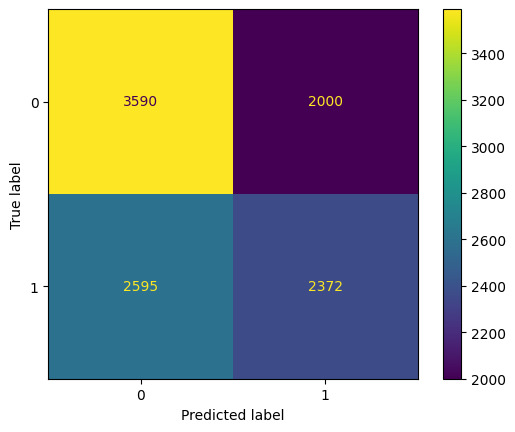

In [103]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nn)

2. XGBoost Classifier

In [104]:
# --- Inisialisasi model XGBoost ---
model_xgb = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=1
)

c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [105]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
# --- Train model ---
model_xgb.fit(
    np.hstack([recipe_train.reshape(-1, 1), X_train_food]),
    y_train,
    sample_weight=class_weight.compute_sample_weight('balanced', y_train)
)

# --- Tambahkan print manual, bukan auto-display objek ---
print("Training selesai.")

Training selesai.


In [106]:
# Evaluasi
y_pred_xgb = model_xgb.predict(np.hstack([recipe_test.reshape(-1, 1), X_test_food]))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5590
           1       0.65      0.65      0.65      4967

    accuracy                           0.67     10557
   macro avg       0.67      0.67      0.67     10557
weighted avg       0.67      0.67      0.67     10557

XGBoost AUC: 0.6705057133791432


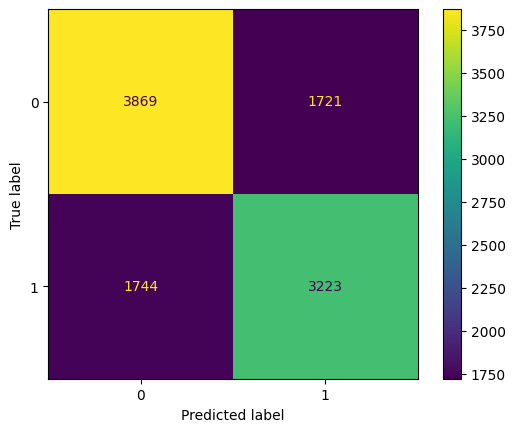

In [107]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)

3. Tuning XGBoost dengan GridSearchCV

In [108]:
import os
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, roc_auc_score

In [109]:
# --- Set environment variable untuk verbose output ---
os.environ['XGBOOST_VERBOSE'] = '1'

In [110]:
# --- Fungsi pembuat model dengan GPU ---
def get_gpu_xgb(**kwargs):
    params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'verbosity': 1
    }
    params.update(kwargs)
    return XGBClassifier(**params)

In [111]:
# --- Gabungkan fitur train & test ---
X_train_full = np.hstack([recipe_train.reshape(-1, 1), X_train_food])
X_test_full = np.hstack([recipe_test.reshape(-1, 1), X_test_food])

# --- Hitung sample_weight untuk mengatasi class imbalance ---
sample_weights = class_weight.compute_sample_weight('balanced', y_train)

# --- Parameter grid untuk tuning ---
param_grid = {
    'n_estimators': [300, 500],             # 2
    'max_depth': [5, 8],                    # 2
    'learning_rate': [0.01],                # 1
    'subsample': [0.8],                     # 1
    'colsample_bytree': [0.8],              # 1
    'gamma': [0, 1],                        # 2
    'min_child_weight': [1, 3],             # 2
    'reg_alpha': [0],                       # 1
    'reg_lambda': [1, 1.5]                  # 2
}

In [112]:
# --- Inisialisasi model GPU ---
model_xgb = get_gpu_xgb()

c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [113]:
# --- Grid Search ---
grid = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    verbose=1,
    n_jobs=2
)

In [114]:
# --- Training model terbaik ---
grid.fit(X_train_full, y_train, sample_weight=sample_weights)

c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     predictor='gpu_predictor',
                                     random_state=None, ...),
             n_jobs=2,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 1],
                         'learning_rate': [0.01], 'max_depth': [5, 8],
                         'min_child_weight': [1, 3], 'n_estimators': [300, 500],
                         'reg_alpha': [0], 'reg_lambda': [1, 1.5],
                         'subsample': [0.8]},
             scoring='f1_macro', verbose=1)

In [115]:
# --- Output hasil tuning ---
print("Best Parameters:", grid.best_params_)
print("Best F1 Score (CV):", grid.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}
Best F1 Score (CV): 0.6788778956709706


In [116]:
# --- Evaluasi pada test set ---
best_xgb = grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_full)
y_proba_xgb = best_xgb.predict_proba(X_test_full)[:, 1]

print("XGBoost Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      5590
           1       0.67      0.65      0.66      4967

    accuracy                           0.68     10557
   macro avg       0.68      0.68      0.68     10557
weighted avg       0.68      0.68      0.68     10557

XGBoost AUC: 0.7478263696028853


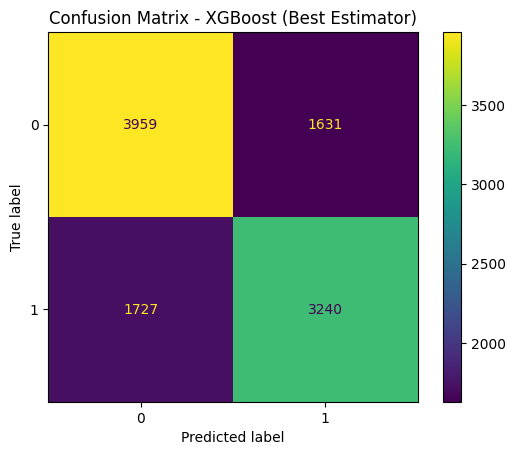

In [117]:
# --- Visualisasi Confusion Matrix ---
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_xgb,
)
plt.title("Confusion Matrix - XGBoost (Best Estimator)")
plt.grid(False)
plt.show()

In [118]:
# Tambahkan kolom pred_prob ke seluruh dataset
X_all_food = np.hstack([data['RecipeId_cat'].values.reshape(-1, 1), scaler.transform(data[features_to_use])])
data['pred_prob'] = best_xgb.predict_proba(X_all_food)[:, 1]

c:\Users\andri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [119]:
import numpy as np
import pandas as pd

# Misal ini fungsi pencarian makanan berdasarkan keyword & target kalori
def recommend_foods(user_data, preferences, top_n=5):
    """
    Rekomendasi makanan berdasarkan:
    - Data user (untuk hitung kalori)
    - Preferensi/keyword
    - Prediksi model
    """
    global data  # Gunakan dataset global
    
    # 1. Hitung kebutuhan kalori harian
    daily_calories = calculate_user_calorie_needs(user_data)
    
    # 2. Hitung target kalori per makanan
    meals_per_day = user_data.get('meals_per_day', 3)
    target_calories_per_meal = daily_calories / meals_per_day
    
    # 3. Proses preferensi user
    keyword_list = [kw.lower().strip() for kw in preferences]
    
    # 4. Filter makanan
    mask = data['Keywords_list'].apply(
        lambda x: any(kw in x for kw in keyword_list) if isinstance(x, list) else False
    )
    
    filtered = data[mask]
    
    # 5. Filter kalori
    calorie_filter = (filtered['Calories'] <= target_calories_per_meal * 1.3) & \
                    (filtered['Calories'] >= target_calories_per_meal * 0.7)
    filtered = filtered[calorie_filter]
    
    # 6. Gunakan prediksi model untuk pemeringkatan
    if 'pred_prob' in filtered.columns:
        filtered = filtered.sort_values(by='pred_prob', ascending=False)
    else:
        # Fallback: urutkan berdasarkan kesesuaian kalori
        filtered['calorie_diff'] = abs(filtered['Calories'] - target_calories_per_meal)
        filtered = filtered.sort_values(by='calorie_diff')
    
    # 7. Filter tambahan untuk diet khusus
    if user_data.get('vegetarian', False):
        filtered = filtered[filtered['Keywords_list'].apply(
            lambda x: 'vegetarian' in x or 'vegan' in x
        )]
    
    return filtered.head(top_n)

In [120]:
import pandas as pd

# Contoh data input dari frontend
user_input = {
    'height': 175,     # cm
    'weight': 70,      # kg
    'age': 30,
    'gender': 'male',
    'activity_level': 'moderate',
    'goal': 'weight_loss',
    'meals_per_day': 3,
    'vegetarian': False,
    'preferences': ['indonesian', 'spicy', 'low calorie']
}

# Dapatkan rekomendasi
recommendations = recommend_foods(
    user_data=user_input,
    preferences=user_input['preferences']
)

# Format output untuk frontend / display
output = []
for _, row in recommendations.iterrows():
    output.append({
        'name': row['Name'],
        'calories': row['Calories'],
        'protein': row['ProteinContent'],
        'carbs': row['CarbohydrateContent'],
        'image': row['Images'],
        'match_score': row.get('pred_prob', 0.8)  # Default jika tidak ada prediksi
    })

# Tampilkan output di Jupyter Notebook
output_df = pd.DataFrame(output)
output_df


,name,calories,protein,carbs,image,match_score
0,Curt's Five Alarm Touchdown Chili Con Carne Wi...,677,55,44,https://img.sndimg.com/food/image/upload/w_555...,0.933852
1,Diane's Crock Pot Chili Con Carne,666,42,19,https://img.sndimg.com/food/image/upload/w_555...,0.926311
2,Chicken Mole for Crock Pot,664,48,22,https://img.sndimg.com/food/image/upload/w_555...,0.919387
3,Spicy-Sweet Ribs and Beans Crock Pot,792,54,80,https://img.sndimg.com/food/image/upload/w_555...,0.907850
4,Pumpkin Spice Cake with Maple Icing,485,6,70,https://img.sndimg.com/food/image/upload/w_555...,0.903849


In [121]:
import pandas as pd

# Contoh data input dari frontend
user_input = {
    'height': 175,     # cm
    'weight': 70,      # kg
    'age': 30,
    'gender': 'male',
    'activity_level': 'moderate',
    'goal': 'weight_loss',
    'meals_per_day': 3,
    'vegetarian': False,
    'preferences': ['indonesian', 'spicy', 'low calorie']
}

# Dapatkan rekomendasi
recommendations = recommend_foods(
    user_data=user_input,
    preferences=user_input['preferences']
)

# Format output untuk frontend / display
output = []
for _, row in recommendations.iterrows():
    output.append({
        'id': row.get('RecipeId', None),  # Tambahkan RecipeId
        'name': row['Name'],
        'calories': row['Calories'],
        'protein': row['ProteinContent'],
        'carbs': row['CarbohydrateContent'],
        'image': row['Images'],
        'match_score': row.get('pred_prob', 0.8)  # Default jika tidak ada prediksi
    })

# Tampilkan output di Jupyter Notebook
output_df = pd.DataFrame(output)
output_df


,id,name,calories,protein,carbs,image,match_score
0,16493,Curt's Five Alarm Touchdown Chili Con Carne Wi...,677,55,44,https://img.sndimg.com/food/image/upload/w_555...,0.933852
1,16761,Diane's Crock Pot Chili Con Carne,666,42,19,https://img.sndimg.com/food/image/upload/w_555...,0.926311
2,112218,Chicken Mole for Crock Pot,664,48,22,https://img.sndimg.com/food/image/upload/w_555...,0.919387
3,53846,Spicy-Sweet Ribs and Beans Crock Pot,792,54,80,https://img.sndimg.com/food/image/upload/w_555...,0.907850
4,12589,Pumpkin Spice Cake with Maple Icing,485,6,70,https://img.sndimg.com/food/image/upload/w_555...,0.903849


In [122]:
from IPython.display import Image, display

for item in output:
    print(f"{item['name']} (Match Score: {item['match_score']:.2f})")
    print(f"Calories: {item['calories']} | Protein: {item['protein']} | Carbs: {item['carbs']}")
    display(Image(url=item['image']))
    print("-" * 50)


Curt's Five Alarm Touchdown Chili Con Carne With Beans (Match Score: 0.93)
Calories: 677 | Protein: 55 | Carbs: 44


--------------------------------------------------
Diane's Crock Pot Chili Con Carne (Match Score: 0.93)
Calories: 666 | Protein: 42 | Carbs: 19


--------------------------------------------------
Chicken Mole for Crock Pot (Match Score: 0.92)
Calories: 664 | Protein: 48 | Carbs: 22


--------------------------------------------------
Spicy-Sweet Ribs and Beans Crock Pot (Match Score: 0.91)
Calories: 792 | Protein: 54 | Carbs: 80


--------------------------------------------------
Pumpkin Spice Cake with Maple Icing (Match Score: 0.90)
Calories: 485 | Protein: 6 | Carbs: 70


--------------------------------------------------


In [123]:
import pickle

# Simpan model dan scaler
with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb, f)
    
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Simpan dataset dengan prediksi
data.to_pickle('food_data_with_predictions.pkl')